## Dataloading

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load data

In [18]:
df = pd.read_csv('200_model_results.csv')

del df['Unnamed: 0']
display(df.head())

,target,mean0,std0,mean1,std1
0,1,0.002673,0.021679,0.997314,0.021544
1,1,0.070589,0.239793,0.929344,0.239826
2,1,0.000142,0.000524,0.999850,0.000577
3,0,0.944513,0.161289,0.055586,0.161470
4,1,0.989608,0.036339,0.009658,0.033814


In [28]:
def classify(x, threshold):
    mean = np.array([x['mean0'], x['mean1']])
    std = np.array([x['std0'], x['std1']])
    if (std[mean.argmax()] < threshold):
        return mean.argmax()
    else:
        return -1

In [29]:
df['test'] = df.apply(classify, args=[0.01], axis=1)

In [30]:
df.head(15)

,target,mean0,std0,mean1,std1,test
0,1,0.002673,2.167855e-02,0.997314,2.154418e-02,-1
1,1,0.070589,2.397933e-01,0.929344,2.398257e-01,-1
2,1,0.000142,5.240253e-04,0.999850,5.772728e-04,1
3,0,0.944513,1.612889e-01,0.055586,1.614697e-01,-1
4,1,0.989608,3.633921e-02,0.009658,3.381356e-02,-1
5,0,0.990453,8.119506e-02,0.009410,8.055458e-02,-1
6,0,0.635325,3.751462e-01,0.365378,3.748431e-01,-1
7,0,0.373514,3.850193e-01,0.623757,3.854727e-01,-1
8,0,0.951198,1.557903e-01,0.048605,1.553988e-01,-1
9,0,0.601549,3.973885e-01,0.399151,3.970672e-01,-1


In [35]:
certain = df[df['test']!=-1]
precision = certain['target'] == certain['test']
print('precision',precision.mean())

recall = df['target'] == df['test']
print('recall',recall.mean())

precision 0.9754283866795991
recall 0.36204


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlabel'

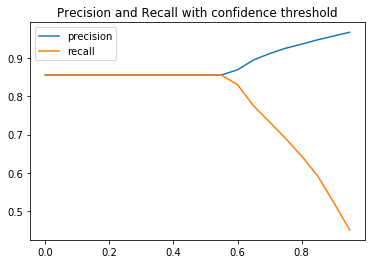

In [56]:
thresholds = list(np.arange(0,1,0.05))
precisions = []
recalls = []

for t in thresholds:
    testdf = df
    testdf['test'] = testdf.apply(classify, args=[1-t], axis=1)
    certain = df[df['test']!=-1]
    precision = certain['target'] == certain['test']
#     print('precision',precision.mean())
    recall = df['target'] == df['test']
#     print('recall',recall.mean())
    precisions.append(precision.mean())
    recalls.append(recall.mean())
    
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.title('Precision and Recall with confidence threshold')
plt.legend(['precision','recall'])
plt.set_xlabel('confidence threshold')
plt.set_ylabel('precision/recall')